In [1]:
# import modules
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import FormatStrFormatter

# import main code
import sys
sys.path.append('/home/jannik/MA/fertige-MA/gitrepo')
from master_project import *

lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4Remnant fit.
Loaded NRSur7dq4 model


In [2]:
# sample points
n = 2**10

# reference time
t_ref = -100

# param var lists
ass = np.linspace(0,.8,n)
qs = np.linspace(1,4,n)
thetas = np.linspace(0,np.pi,n)
phis = np.linspace(0,2*np.pi,n)

In [3]:
# a variation

q = 1
phi1 = 0
theta1 = np.pi/2
chi2 = [0.,0.,0.]

s_max_a = []
a_max_a = []

for a in ass:
    
    chi1x = a * np.sin(theta1) * np.cos(phi1)
    chi1y = a * np.sin(theta1) * np.sin(phi1)
    chi1z = a * np.cos(theta1)
    chi1 = [chi1x, chi1y, chi1z]
    
    f_ref = get_f_ref(q, chi1, chi2, t_ref)
    t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
    h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
    
    ampl_s_max = np.max(ampl_sym(h_copr, 2, 2))
    ampl_a_max = np.max(ampl_asym(h_copr, 2, 2))
    s_max_a.append(ampl_s_max)
    a_max_a.append(ampl_a_max)

In [4]:
# q variation

a = 0.8
phi1 = 0
theta1 = np.pi/2
chi1x = a * np.sin(theta1) * np.cos(phi1)
chi1y = a * np.sin(theta1) * np.sin(phi1)
chi1z = a * np.cos(theta1)
chi1 = [chi1x, chi1y, chi1z]
chi2 = [0.,0.,0.]

s_max_q = []
a_max_q = []

for q in qs:
    
    f_ref = get_f_ref(q, chi1, chi2, t_ref)
    t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
    h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
    
    ampl_s_max = np.max(ampl_sym(h_copr, 2, 2))
    ampl_a_max = np.max(ampl_asym(h_copr, 2, 2))
    s_max_q.append(ampl_s_max)
    a_max_q.append(ampl_a_max)

In [5]:
# theta variation

q = 1
a = 0.8
phi1 = 0
chi2 = [0.,0.,0.]

s_max_th = []
a_max_th = []

for theta1 in thetas:
    
    chi1x = a * np.sin(theta1) * np.cos(phi1)
    chi1y = a * np.sin(theta1) * np.sin(phi1)
    chi1z = a * np.cos(theta1)
    chi1 = [chi1x, chi1y, chi1z]
    
    f_ref = get_f_ref(q, chi1, chi2, t_ref)
    t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
    h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
    
    ampl_s_max = np.max(ampl_sym(h_copr, 2, 2))
    ampl_a_max = np.max(ampl_asym(h_copr, 2, 2))
    s_max_th.append(ampl_s_max)
    a_max_th.append(ampl_a_max)

In [6]:
# phi variation

q = 1
a = 0.8
theta1 = np.pi/2
chi2 = [0.,0.,0.]

s_max_ph = []
a_max_ph = []

for phi1 in phis:
    
    chi1x = a * np.sin(theta1) * np.cos(phi1)
    chi1y = a * np.sin(theta1) * np.sin(phi1)
    chi1z = a * np.cos(theta1)
    chi1 = [chi1x, chi1y, chi1z]
    
    f_ref = get_f_ref(q, chi1, chi2, t_ref)
    t, h_iner, dyn = sur(q, chi1, chi2, dt=dt, f_low=f_low, f_ref=f_ref)
    h_copr = modes_from_iner_to_new_frame(t, h_iner, frame='coprecessing')
    
    ampl_s_max = np.max(ampl_sym(h_copr, 2, 2))
    ampl_a_max = np.max(ampl_asym(h_copr, 2, 2))
    s_max_ph.append(ampl_s_max)
    a_max_ph.append(ampl_a_max)

In [7]:
np.savetxt('s_max_ph', s_max_ph, delimiter=',')
np.savetxt('a_max_ph', a_max_ph, delimiter=',')
np.savetxt('s_max_th', s_max_th, delimiter=',')
np.savetxt('a_max_th', a_max_th, delimiter=',')
np.savetxt('s_max_q', s_max_q, delimiter=',')
np.savetxt('a_max_q', a_max_q, delimiter=',')
np.savetxt('s_max_a', s_max_a, delimiter=',')
np.savetxt('a_max_a', a_max_a, delimiter=',')

In [3]:
path = 'datafiles/param_variation/'

s_max_ph = np.loadtxt(path+'s_max_ph') 
a_max_ph = np.loadtxt(path+'a_max_ph') 
s_max_th = np.loadtxt(path+'s_max_th') 
a_max_th = np.loadtxt(path+'a_max_th')
s_max_q = np.loadtxt(path+'s_max_q')
a_max_q = np.loadtxt(path+'a_max_q')
s_max_a = np.loadtxt(path+'s_max_a') 
a_max_a = np.loadtxt(path+'a_max_a')

In [4]:
size = 17

params = {'xtick.labelsize' : size, 
          'ytick.labelsize' : size, 
          'axes.labelsize' : size, 
          'legend.fontsize' : size, 
          'font.size' : size,
          'axes.titlesize': size
         }
plt.rcParams.update(params)

In [63]:
# q PN expressions

def etaM(q):
    return q/(1+q)**2

def eta1deltaM(q):
    return 2*q**2/(1+q)**3 

def asPN(q):
    eta = q/((1+q)**2)
    ampl = 4*np.sqrt(np.pi/5)*np.pi**(-2/3)/21
    return ampl*eta*(42 + 84 + np.pi**(-2/3)*(-107 + 55*eta))

asPN(1)

1.4522305419297654

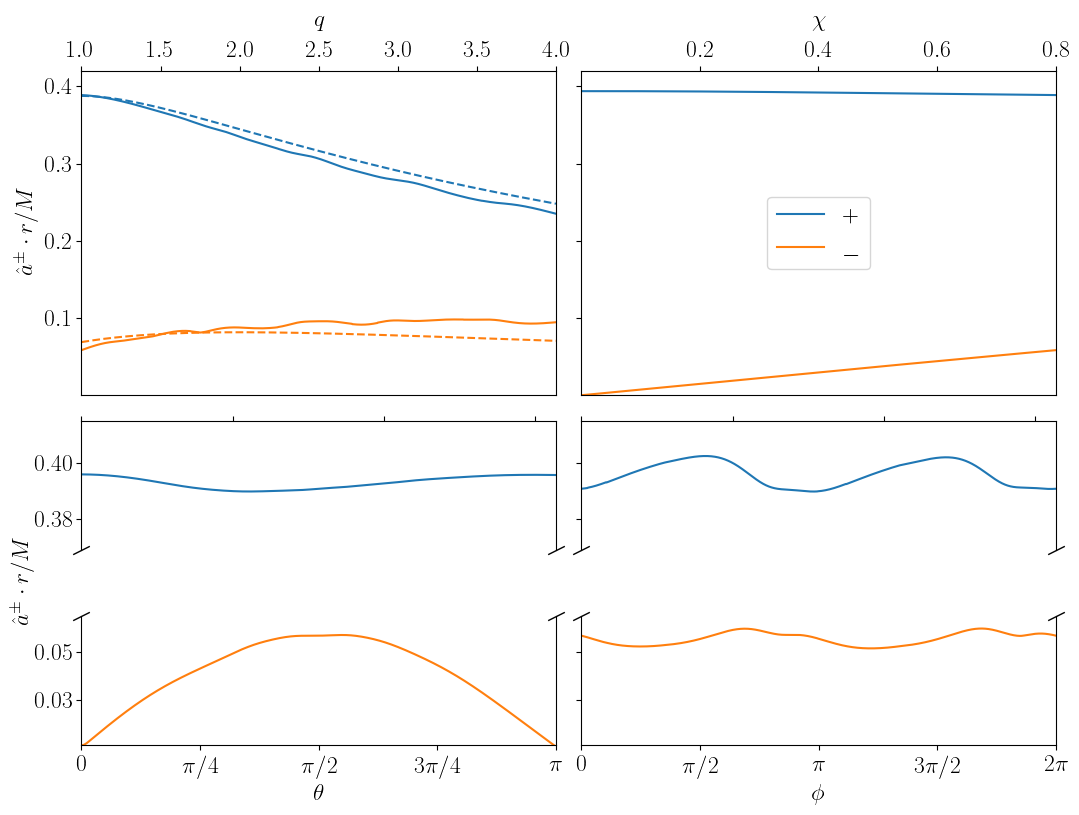

In [75]:
# setup plot grid
fig = plt.figure(figsize=(10,7), constrained_layout = True)
subfigs = fig.subfigures(2, 2)
plot1 = subfigs[0,0].subplots(1,1)
plot2 = subfigs[0,1].subplots(1,1, sharey=True)
plot3, plot4 = subfigs[1,0].subplots(2,1) 
plot5, plot6 = subfigs[1,1].subplots(2,1) 


# limits lower plots
lim1, lim2, lim3, lim4 = .001, .069, .361, .419

# limits upper plots
limu, limo = 0.0001, 0.42

# thickness broken axis symbol
d = .5 


# q
plot1.plot(qs, s_max_q)
plot1.plot(qs, a_max_q)
plot1.set_xlabel(r'$q$', labelpad=10)
plot1.set_ylabel(r'$\hat{a}^\pm \cdot r/M$')
plot1.xaxis.tick_top()
plot1.xaxis.set_label_position('top')
plot1.set_ylim(limu, limo)
plot1.set_xlim(1,4)
as_q_scale = 1.55#4*np.sqrt(np.pi/5)*np.pi**(-2/3)*42/21
plot1.plot(qs, as_q_scale*etaM(qs), '--', color='tab:blue')
aa_q_scale = 2*np.sqrt(np.pi/5)*0.8*(np.pi)**(-4/3)
plot1.plot(qs, aa_q_scale*eta1deltaM(qs), '--', color='tab:orange')


# a
plot2.plot(ass, s_max_a, label='$+$')
plot2.plot(ass, a_max_a, label='$-$')
plot2.legend(loc='center')
plot2.set_xlabel(r'$\chi$', labelpad=10)
plot2.xaxis.tick_top()
plot2.xaxis.set_label_position('top')
plot2.tick_params('y', labelleft=False)
plot2.set_ylim(limu, limo)
plot2.set_xlim(0.001,.8)


# theta  
plot3.plot(thetas, s_max_th)
plot4.plot(thetas, a_max_th, color='tab:orange')
plot3.set_ylim(lim3, lim4)
plot4.set_ylim(lim1, lim2) 
plot3.spines.bottom.set_visible(False)
plot4.spines.top.set_visible(False)
plot3.xaxis.tick_top()
plot3.tick_params(labeltop=False)  # don't put tick labels at the top
plot4.xaxis.tick_bottom()
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
plot3.plot([0, 1], [0, 0], transform=plot3.transAxes, **kwargs)
plot4.plot([0, 1], [1, 1], transform=plot4.transAxes, **kwargs)
plot4.set_xlabel(r'$\theta$')
plot4.set_ylabel(r'$\hat{a}^\pm \cdot r/M$')
plot4.set_xticks(np.arange(0, np.pi+np.pi/4, step=(np.pi/4)), ['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$'])
plot4.yaxis.set_label_coords(-0.1,1.25)
plot4.set_xlim(0,np.pi)
plot3.set_xlim(0,np.pi)
plot4.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plot3.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


# phi 
plot5.plot(phis, s_max_ph)
plot6.plot(phis, a_max_ph, color='tab:orange')
plot5.set_ylim(lim3, lim4)
plot6.set_ylim(lim1, lim2) 
plot5.spines.bottom.set_visible(False)
plot6.spines.top.set_visible(False)
plot5.xaxis.tick_top()
plot5.tick_params(labeltop=False)  # don't put tick labels at the top
plot6.xaxis.tick_bottom()
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
plot5.plot([0, 1], [0, 0], transform=plot5.transAxes, **kwargs)
plot6.plot([0, 1], [1, 1], transform=plot6.transAxes, **kwargs)
plot6.set_xlabel(r'$\phi$')
plot6.set_xticks(np.arange(0, 2*np.pi+np.pi/2, step=(np.pi/2)), ['0',r'$\pi/2$',r'$\pi$',r'$3\pi/2$',r'$2\pi$'])
plot5.tick_params('y', labelleft=False)
plot6.tick_params('y', labelleft=False)
plot6.set_xlim(0,2*np.pi)
plot5.set_xlim(0,2*np.pi)

fig.tight_layout()
#fig.savefig('parameter_var.pdf', bbox_inches='tight')
plt.show()